***Autores**: David Zheng 1666559  &  Yanhao Lin 1670136*

<h1 style="color:#4599db"; font-weight:bold>Cas Kaggle: League of Legends Diamond Ranked Games (10 min)</h1>

## 1. Introducción del proyecto

League of Legends (LoL) es un videojuego de estrategia en tiempo real y multijugador en línea (MOBA, por sus siglas en inglés) lanzado en 2009 por Riot Games, se ha convertido en uno de los videojuegos más populares del mundo, con una comunidad activa y competiciones de e-sports de gran relevancia global. En LoL, dos equipos de cinco jugadores compiten en un mapa con el objetivo de destruir el "nexo" del equipo contrario, la estructura más importante protegida por las torres y que otorga la victoria al equipo que logre destruirlo antes. Cada jugador controla un "campeón", que es un personaje con habilidades únicas, y el éxito depende tanto de la estrategia grupal como de la habilidad individual.

El dataset seleccionado, "[League of Legends Diamond Ranked Games (10 min)](https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min)", extraído de Kaggle, contiene información detallada sobre partidas jugadas en el nivel de rango Diamante, uno de los niveles más altos en el juego, en el cual los jugadores dominan estrategias avanzadas y tienen un conocimiento profundo de las mecánicas del juego. El objetivo de este análisis es profundizar en los factores que determinan el rendimiento en las partidas de alto nivel, analizando métricas clave durante los primeros 10 minutos de juego para predecir el equipo ganador a partir de los datos de la partida.

<img src="https://i0.wp.com/velemenyhuszarok.hu/wp-content/uploads//2021/03/LOL.jpg" alt="Descripción" width="500" height="325">

## 2. Importación de librerías
Antes de comenzar, importamos las librerias que utilizaremos en este proyecto.

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, RocCurveDisplay
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

## 3. Exploración de datos
En este apartado vamos a hacer una introducción de los datos que tiene el dataset, analizando todos los componentes y factores del juego y también los atributos que tiene el dataset.

Primero de todo, leemos el archivo .csv que contiene los datos del dataset y mostramos:

In [69]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('Dataset/high_diamond_ranked_10min.csv')
df

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,0,0,17765,7.2,18967,211,69,2519,2469,21.1,1776.5,46,3,0,4,7,7,0,0,0,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,0,0,16238,7.2,19255,233,48,782,888,23.3,1623.8,12,21,1,4,6,3,0,0,0,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,0,0,15903,7.0,18032,210,45,-2416,-1877,21.0,1590.3,14,0,1,7,6,11,1,1,0,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,0,0,14459,6.6,17229,224,48,-839,-1085,22.4,1445.9,66,4,0,3,2,1,0,0,0,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


Mostramos también el tipo de todos los atributos:

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

Antes de empezar a analizar los datos hemos de familiarizarnos con el dataset, para ello primero hemos de entender qué significa cada uno de estos atributos y vamos a realizar una breve explicación para ellos. Los podemos dividir en diferentes categorias para explicar:

**General**
* gameId: Un número identificador único para cada partida.
* blueWins (Target): Indica si el equipo azul ha ganado (1) o ha perdido (0).

**Visión**
* blueWardsPlaced / redWardsPlaced: Número de wards (centinelas) colocados por cada equipo, que permiten obtener visión del mapa.
* blueWardsDestroyed / redWardsDestroyed: Número de wards (centinelas) enemigos destruidos por cada equipo.

**Combate**
* blueFirstBlood / redFirstBlood: Indica si el equipo logró la primera sangre (1) o no (0) (primer asesinato de la partida).
* blueKills / redKills: Número total de asesinatos realizados por cada equipo.
* blueDeaths / redDeaths: Número total de muertes sufridas por cada equipo.
* blueAssists / redAssists: Número de asistencias (jugadores que ayudaron en un asesinato) realizadas por cada equipo.

**Monstruos Épicos** \
Los monstruos épicos son monstruos neutrales que otorgan ventajas al equipo que logre hacerse con ellos.
* blueEliteMonsters / redEliteMonsters: Número total de objetivos épicos (Dragones y Heraldo de la Grieta) asegurados.
* blueDragons / redDragons: Número de dragones obtenidos.
* blueHeralds / redHeralds: Número de Heraldos de la Grieta obtenidos.

**Estructuras** \
Las torres son estructuras que protegen la base y han de destruidas antes de poder acceder al nexo.
* blueTowersDestroyed / redTowersDestroyed: Número de torres enemigas destruidas por cada equipo.

**Economía** \
El oro es el recurso principal de cada jugador con el cual se pueden comprar objetos para su campeón y así mejorar la capacidad de combate del campeón utilizado.
* blueTotalGold / redTotalGold: Oro acumulado por cada equipo.
* blueGoldDiff / redGoldDiff: Diferencia de oro entre los dos equipos (positivo si es a favor del equipo).
* blueGoldPerMin / redGoldPerMin: Tasa promedio de obtención de oro por minuto de cada equipo.

**Experiencia y nivel** \
La experiencia de los campeones es una mecánica que permite subir de nivel a los campeones después de obtener suficiente experiencia. Subir de nivel mejora las estadísticas base y otorga nuevas habilidades a los campeones.
* blueAvgLevel / redAvgLevel: Nivel promedio de los campeones del equipo.
* blueTotalExperience / redTotalExperience: Experiencia acumulada por todo el equipo.
* blueExperienceDiff / redExperienceDiff: Diferencia de experiencia acumulada entre ambos equipos (positivo si es a favor del equipo).

**CS (Creep Score)** \
Ambos nexos generan una oleada de súbditos hacia cada línea del mapa periódicamente, matar estos súbditos otorga oro y experiencia.
Cada campeón tiene su puntuación CS que indica la cantidad de súbditos y monstruos asesinados.
* blueTotalMinionsKilled / redTotalMinionsKilled: Número total de súbditos asesinados por cada equipo.
* blueTotalJungleMinionsKilled / redTotalJungleMinionsKilled: Número de monstruos de la jungla asesinados por cada equipo.
* blueCSPerMin / redCSPerMin: Tasa de Creep Score por minuto de cada equipo. asesinados) por minuto de cada equipo.

Antes de empezar con el apartado siguiente, vamos a verificar si en el dataset que tenemos contiene datos nulos (NaN), en el caso afirmativo, es necesario tratarlos:

In [71]:
print('Hay valores nulos en el dataset? :', df.isna().sum().sum() > 0)

Hay valores nulos en el dataset? : False


Dado que el código nos devuelva False, significa que el nuestro dataset no contiene NaNs, podemos trabajar tranquilamente con ellos.

**División Train y Test** \
Finalmente, vamos a dividir nuestro conjunto de datos en dos subconjuntos Train y Test para que el modelo se pueda evaluar de manera objetiva y que esté preparado para desempeñarse bien en escenarios reales para datos no observados.
* **Train**: subconjunto utilizado para entrenar el modelo.
* **Test**: subconjunto utilizado para evaluar el modelo.

La función train_test_split divide los datos en dos subconjuntos Train y Test. Vamos a utilizar los valores más habituales para dichos subconjuntos, un 80% para Train y un 20% para Test.

In [72]:
train, test = train_test_split(df, test_size=0.2)

## 4. Análisis y preprocesamiento de datos
Una vez que estamos familiarizados con el dataset, en este apartado vamos a analizar los datos mostrados anteriormente. Para hacerlo, primero tenemos que quitar las columnas que no nos afectan al análisis y también las que repiten información:
* gameId: no ayuda ya que es simplemente un identificador de las filas.
* blueExperienceDiff / redExperienceDiff: es irrelevante ya que es el resultado de la resta de TotalExperience de ambos equipos.
* blueGoldDiff / redGoldDiff: se descarta por la misma razón que ExperienceDiff.
* redFirstBlood: se descarta por la misma razón que los casos anteriores, si blueFirstBlood = 1, redFirstBlood = 0 y viceversa.
* blueGoldPerMin / redGoldPerMin: podemos quitar ambos atributos porque ya tenemos el atributo TotalGold que nos indica el total de oro obtenido por cada equipo y GoldPerMin simplemente es dividir el total entre 10 minutos, cosa que es innecesaria.
* blueCSPerMin / redCSPerMin: igual que GoldPerMin, ya tenemos el atributo TotalMinionsKilled y CSPerMin es simplemente una división de TotalMinionsKilled entre 10 minutos.
* blueDeaths / redDeaths: Los consideramos negligibles porque blueDeaths es igual que redKills, lo mismo con redDeaths igual que blueKills.
* blueAvgLevel / redAvgLevel: se descartan debido a que ya tenemos el atributo TotalExperience que es más exacto.

In [73]:
# Seleccionar los atributos innecesarios
cols_to_delete = ['gameId', 'blueExperienceDiff', 'redExperienceDiff', 'blueGoldDiff', 'redGoldDiff', 'redFirstBlood', 'blueGoldPerMin', 'redGoldPerMin', 
                  'blueCSPerMin', 'redCSPerMin', 'blueDeaths', 'redDeaths', 'blueAvgLevel', 'redAvgLevel']

# Eliminar dichos atributos
train = train.drop(cols_to_delete, axis=1)
train

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,redWardsPlaced,redWardsDestroyed,redKills,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled
2543,0,45,2,1,9,6,2,1,1,0,18233,21650,244,58,12,15,4,7,0,0,0,0,14914,16366,177,53
8584,1,18,2,0,6,8,2,1,1,0,16814,18759,231,59,17,0,2,2,0,0,0,0,15295,17655,234,52
9368,1,18,2,0,10,15,1,1,0,0,17877,17302,186,43,19,3,12,9,1,0,1,0,18797,18864,231,40
8640,1,15,1,1,12,13,0,0,0,0,19292,18153,210,34,17,1,5,5,1,1,0,0,14651,15862,172,52
9782,0,16,6,1,10,10,0,0,0,0,17818,17651,204,41,45,9,9,9,0,0,0,0,19090,19285,258,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3356,1,30,3,1,4,5,1,1,0,0,15860,18449,228,63,145,2,7,9,1,0,1,0,17020,18461,203,48
9366,0,19,3,1,5,2,0,0,0,0,15429,16825,227,48,53,1,8,10,0,0,0,0,16909,18191,218,42
9262,0,18,3,1,10,7,1,1,0,0,18302,18149,215,40,15,4,6,4,1,0,1,0,15685,16977,178,63
1386,0,16,0,0,1,1,1,1,0,0,12798,13908,179,36,13,2,16,16,0,0,0,1,20666,19247,223,44


Una vez quitadas la columnas irrelevantes, mostramos el heatmap y la matriz de correlación para analizar las correlaciones entre los atributos y el target:

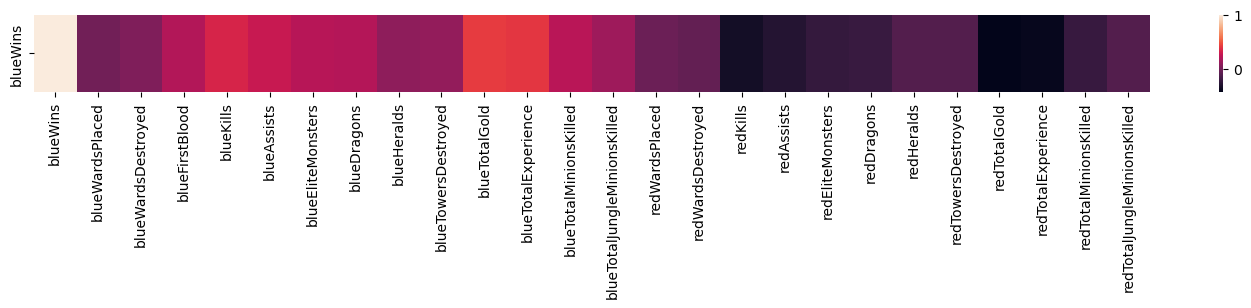

In [74]:
# Crear Heatmap respect to Target (blueWins)
blueWins_correlation = train.corr()['blueWins'].to_frame().T 
plt.subplots(figsize=(18, 1))
sns.heatmap(blueWins_correlation)
plt.show()

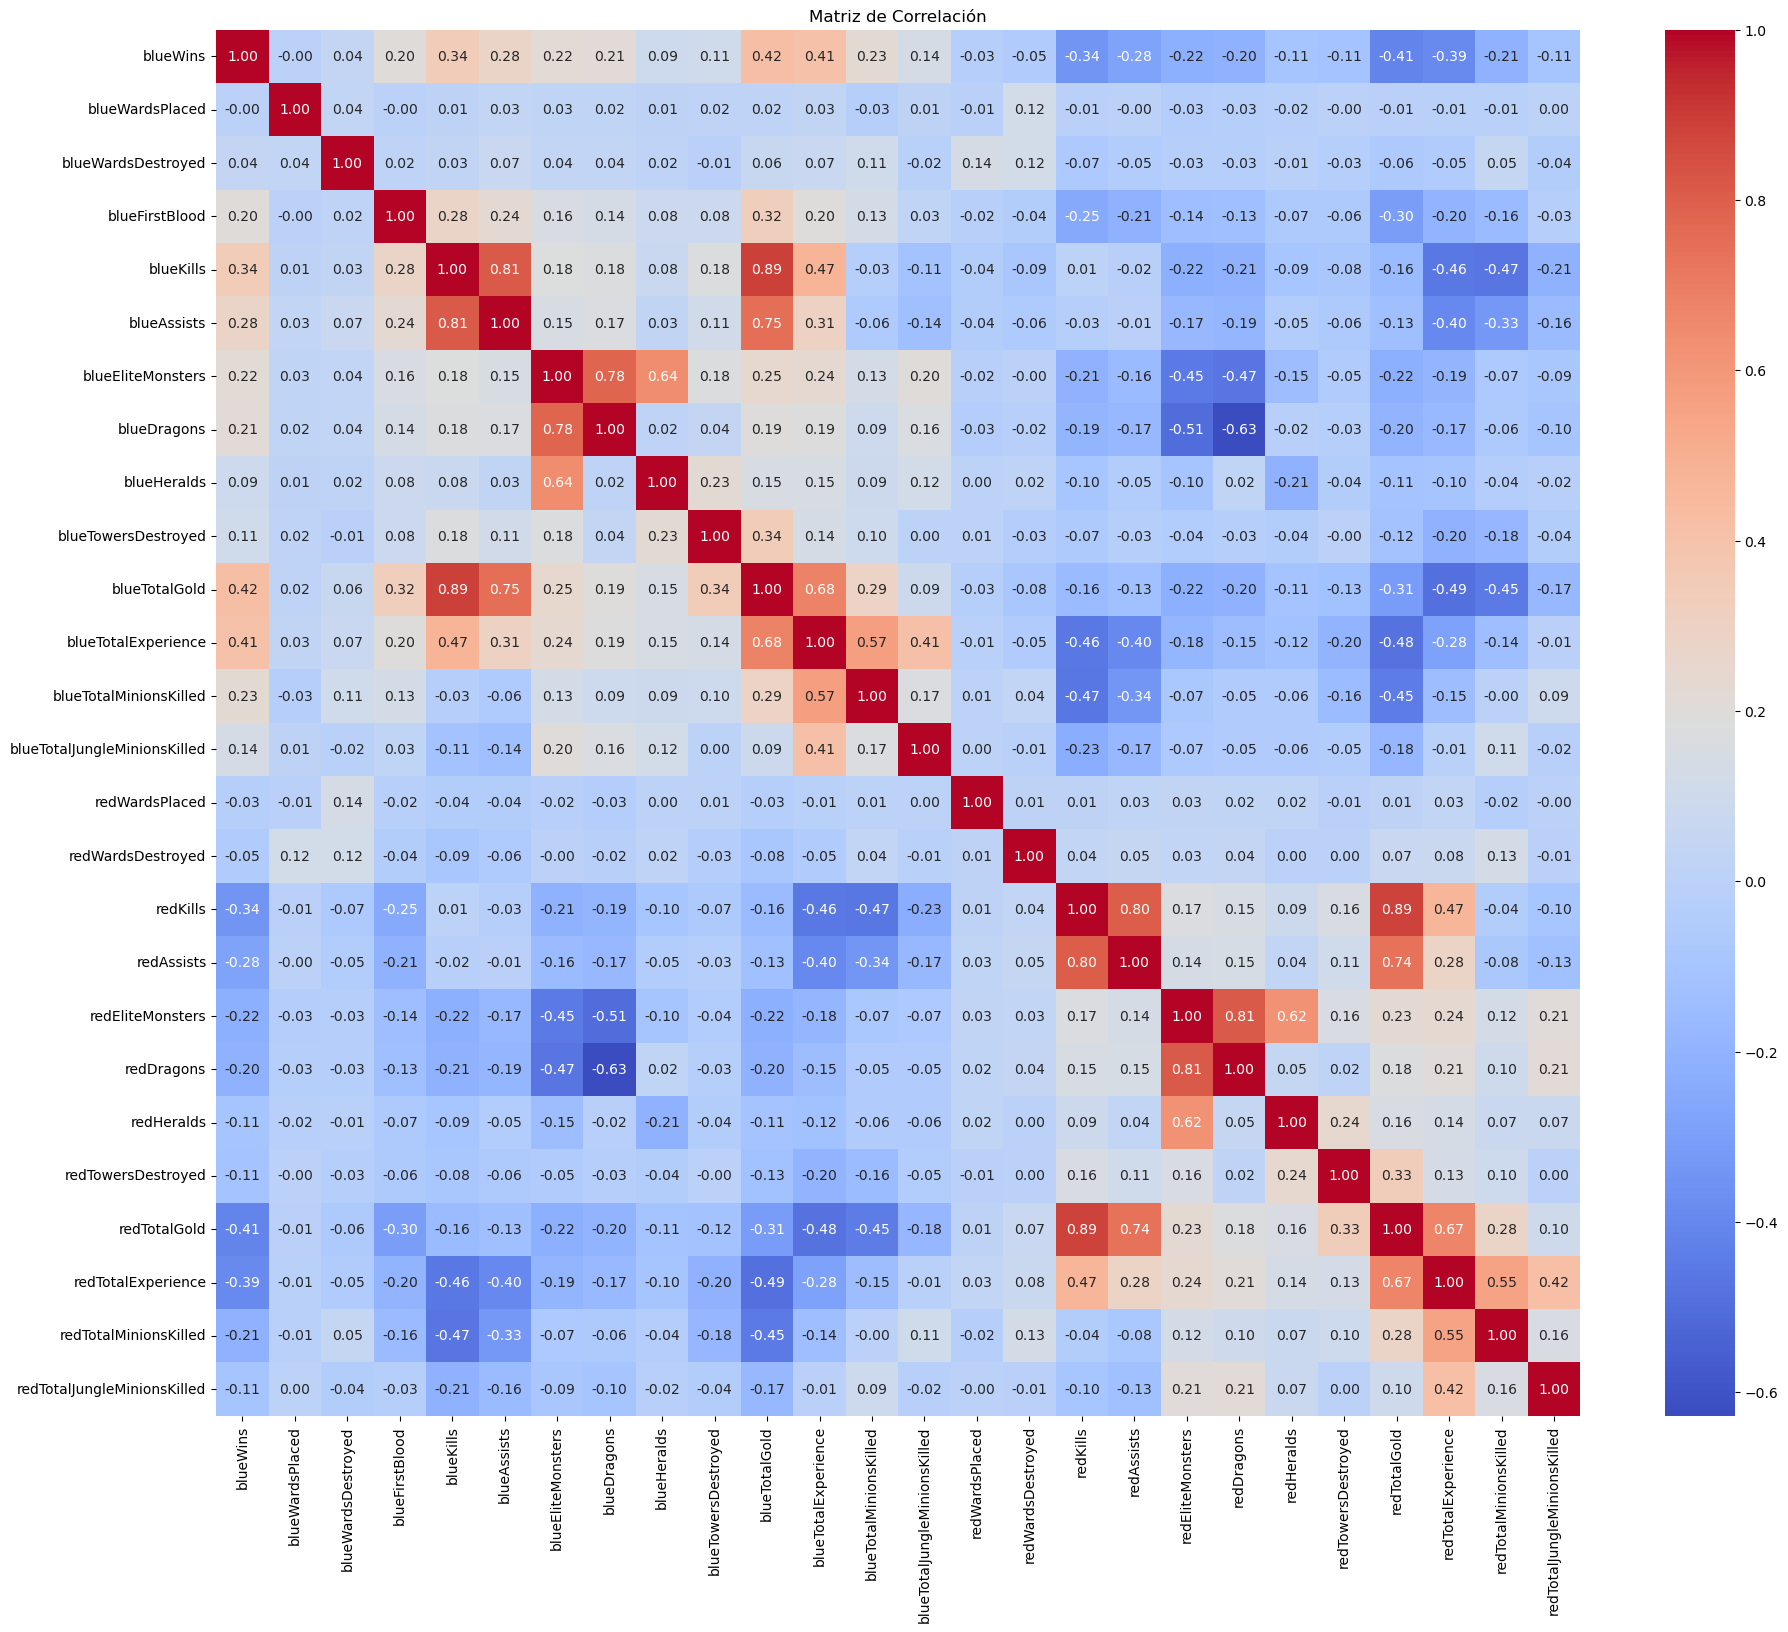

In [75]:
# Crear Matriz de correlación con todos los valores
correlation_matrix = train.corr()
plt.figure(figsize=(22, 18))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

Basándonos en la matriz de correlación, que nos ayuda a identificar relaciones entre las variables, podemos filtrar y quitar aquellas columnas que tengan poca correlación con la variable target.

Mostramos los valores concretos de las correlaciones y los ordenamos para visualizar mejor:

In [76]:
# Correlaciones con la variable objetivo
correlations_with_target = correlation_matrix["blueWins"].sort_values(key=abs, ascending=False)

# Mostrar las correlaciones
print(correlations_with_target)

blueWins                        1.000000
blueTotalGold                   0.421953
redTotalGold                   -0.414796
blueTotalExperience             0.408567
redTotalExperience             -0.388336
redKills                       -0.342552
blueKills                       0.341933
redAssists                     -0.279567
blueAssists                     0.279541
blueTotalMinionsKilled          0.227319
blueEliteMonsters               0.221221
redEliteMonsters               -0.220277
blueDragons                     0.213433
redTotalMinionsKilled          -0.207084
blueFirstBlood                  0.204620
redDragons                     -0.201932
blueTotalJungleMinionsKilled    0.139077
blueTowersDestroyed             0.109530
redTowersDestroyed             -0.108967
redHeralds                     -0.105907
redTotalJungleMinionsKilled    -0.105795
blueHeralds                     0.091053
redWardsDestroyed              -0.054754
blueWardsDestroyed              0.043429
redWardsPlaced  

A partir de esta información, podemos definir un umbral de correlación para determinar qué variables conservar, por ejemplo,  |correlación| > 0,2.

In [77]:
# Filtrar variables con correlación significativa (por ejemplo, mayor que 0.2)
corr_threshold = 0.2
significant_vars = correlations_with_target[abs(correlations_with_target) > corr_threshold]

# Mostrar las variables significativas
print(significant_vars)

blueWins                  1.000000
blueTotalGold             0.421953
redTotalGold             -0.414796
blueTotalExperience       0.408567
redTotalExperience       -0.388336
redKills                 -0.342552
blueKills                 0.341933
redAssists               -0.279567
blueAssists               0.279541
blueTotalMinionsKilled    0.227319
blueEliteMonsters         0.221221
redEliteMonsters         -0.220277
blueDragons               0.213433
redTotalMinionsKilled    -0.207084
blueFirstBlood            0.204620
redDragons               -0.201932
Name: blueWins, dtype: float64


In [78]:
# Crear una nueva tabla con las variables seleccionadas a Train
selected_columns = significant_vars.index.tolist()
train_filtered = train[selected_columns]
train_filtered

,blueWins,blueTotalGold,redTotalGold,blueTotalExperience,redTotalExperience,redKills,blueKills,redAssists,blueAssists,blueTotalMinionsKilled,blueEliteMonsters,redEliteMonsters,blueDragons,redTotalMinionsKilled,blueFirstBlood,redDragons
2543,0,18233,14914,21650,16366,4,9,7,6,244,2,0,1,177,1,0
8584,1,16814,15295,18759,17655,2,6,2,8,231,2,0,1,234,0,0
9368,1,17877,18797,17302,18864,12,10,9,15,186,1,1,1,231,0,0
8640,1,19292,14651,18153,15862,5,12,5,13,210,0,1,0,172,1,1
9782,0,17818,19090,17651,19285,9,10,9,10,204,0,0,0,258,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3356,1,15860,17020,18449,18461,7,4,9,5,228,1,1,1,203,1,0
9366,0,15429,16909,16825,18191,8,5,10,2,227,0,0,0,218,1,0
9262,0,18302,15685,18149,16977,6,10,4,7,215,1,1,1,178,1,0
1386,0,12798,20666,13908,19247,16,1,16,1,179,1,0,1,223,0,0


Una vez filtrado el subconjunto Train, tenemos que aplicar los mismos cambios al de Test:

In [79]:
# Crear una nueva tabla con las mismas variables seleccionadas de Train a Test
test_filtered = test[selected_columns]
test_filtered

,blueWins,blueTotalGold,redTotalGold,blueTotalExperience,redTotalExperience,redKills,blueKills,redAssists,blueAssists,blueTotalMinionsKilled,blueEliteMonsters,redEliteMonsters,blueDragons,redTotalMinionsKilled,blueFirstBlood,redDragons
2189,1,16242,14086,17867,15766,2,7,3,5,218,1,0,0,212,1,0
1592,0,16051,15528,17771,18831,5,6,4,5,197,0,1,0,226,1,1
8784,0,15781,17761,17614,19209,9,5,11,3,203,1,0,1,228,1,0
7253,0,14508,18476,17217,19678,6,3,7,3,200,0,2,0,243,0,1
5034,1,16815,16132,17824,18032,7,6,12,9,235,1,1,1,179,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2279,0,16450,17027,17518,19471,6,6,5,9,212,0,2,0,239,1,1
211,1,18106,17244,16668,17110,9,12,11,15,186,0,1,0,204,0,1
635,0,14682,16509,17105,19164,5,4,5,3,199,0,0,0,235,1,0
4846,0,15946,16779,16836,17768,9,7,10,7,170,0,1,0,230,1,0


Finalmente, podemos mirar si las categorías están balanceadas según el target. La distribución entre categorías puede afectar a la clasificación ya que si existe un desequilibrio muy extremo como por ejemplo 99/1, el modelo de clasificación estará muy favorecida hacia la categoría mayoritaria.

blueWins
0    3973
1    3930
Name: count, dtype: int64
blueWins
1    1000
0     976
Name: count, dtype: int64
blueWins
0    50.272049
1    49.727951
Name: proportion, dtype: float64
blueWins
1    50.607287
0    49.392713
Name: proportion, dtype: float64


<Figure size 1200x600 with 0 Axes>

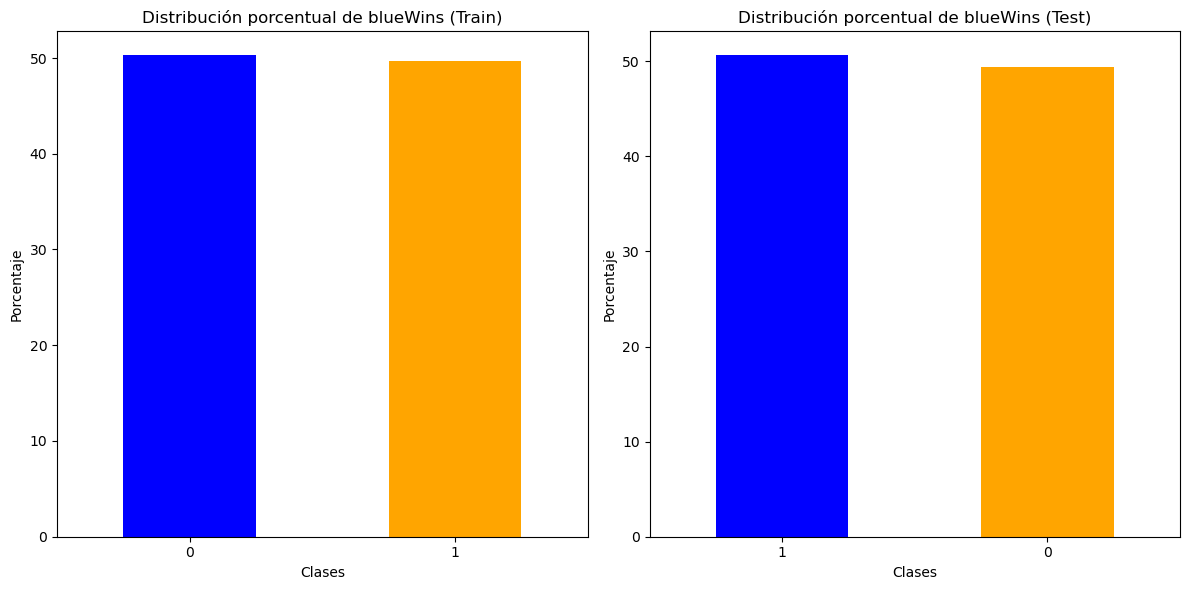

In [80]:
distribution_train = train_filtered['blueWins'].value_counts()
distribution_test = test_filtered['blueWins'].value_counts()

percentage_distribution_train = train_filtered['blueWins'].value_counts(normalize=True)* 100
percentage_distribution_test = test_filtered['blueWins'].value_counts(normalize=True)* 100

print(distribution_train)
print(distribution_test)
print(percentage_distribution_train)
print(percentage_distribution_test)

# Gráficos de la distribución de las clases en número absoluto
plt.figure(figsize=(12, 6))

# Gráficos de la distribución de las clases en porcentaje
plt.figure(figsize=(12, 6))

# Porcentaje en el conjunto de entrenamiento
plt.subplot(1, 2, 1)
percentage_distribution_train.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribución porcentual de blueWins (Train)')
plt.xlabel('Clases')
plt.ylabel('Porcentaje')
plt.xticks(rotation=0)

# Porcentaje en el conjunto de prueba
plt.subplot(1, 2, 2)
percentage_distribution_test.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribución porcentual de blueWins (Test)')
plt.xlabel('Clases')
plt.ylabel('Porcentaje')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

Observando la distribución entre categorías determinamos que están muy balanceadas y no habrán desequilibrios en los datos.

## 5. Preparación de datos

En este apartado, vamos a separar los datos en variables X e Y, siendo X los atributos y siendo Y la variable objetivo.

In [81]:
# Separar el target después de dividir
x_train = train_filtered.drop(columns=["blueWins"])
y_train = train_filtered["blueWins"]

x_test = test_filtered.drop(columns=["blueWins"])
y_test = test_filtered["blueWins"]

## 6. Selección del modelo
En este apartado, vamos a probar varios algoritmos del aprendizaje computacional, compararlos utilizando **Cross-Validation** en base a métricas como Accuracy, F1-score, Precision, etc, y elegir el que mejor se desempeñe para el problema. En nuestro caso, hemos decidido aplicar el stratified K-fold cross-validation ya que preserva la proporción de clases en cada fold.

***Selección de métrica:*** \
En la última sección del apartado 4, hemos comprobado que las clases en el dataset están muy balanceadas, es decir, blueWins expone de una proporción de "0" ≈ 50.1% y "1" ≈ 49.9%, por lo cuál, vamos a utilizar la métrica Accuracy para realizar dicho análisis.

***Normalización de datos:*** \
Antes de comenzar, dado que vamos a utilizar algoritmos que son sensibles a la escala de las variables, como por ejemplo K-Nearest Neighbors (KNN) y Support Vector Machines (SVM), utilizaremos el método StandardScaler para normalizar las características del conjunto de datos antes de entrenar los modelos.

In [82]:
# Definir los modelos con hiperparámetros por defecto
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
}

# Normalización de datos
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Realizar Cross-Validation para cada modelo
cv_results = {}
skf = StratifiedKFold()

for model_name, model in models.items():
    # Realizar un 5-fold cross-validation
    scores = cross_val_score(model, x_train_scaled, y_train, cv=skf, scoring='accuracy')
    
    # Guardar el promedio accuracy
    cv_results[model_name] = scores.mean()
    
    print(f"{model_name}: Accuracy promedio = {cv_results[model_name]:.4f}")

Logistic Regression: Accuracy promedio = 0.7369
Decision Tree: Accuracy promedio = 0.6358
Random Forest: Accuracy promedio = 0.7223
SVM: Accuracy promedio = 0.7266
KNN: Accuracy promedio = 0.6873


Podemos graficar los resultados de Cross-Validation para facilitar la comparación:

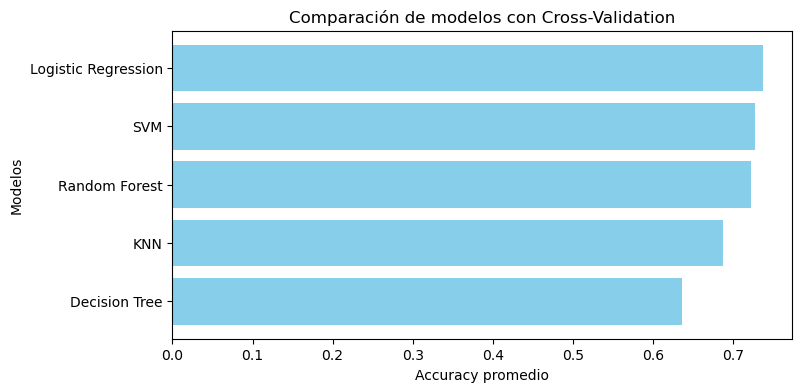

In [83]:
# Ordenar cv_results
sorted_results = sorted(cv_results.items(), key=lambda x: x[1], reverse=True)

# Extraer nombres y valores para graficar
model_names = [model for model, _ in sorted_results]
mean_accuracies = [mean for _, (mean) in sorted_results]

# Crear gráfico de barras
plt.figure(figsize=(8, 4))
plt.barh(model_names, mean_accuracies, color='skyblue')
plt.xlabel('Accuracy promedio')
plt.ylabel('Modelos')
plt.title('Comparación de modelos con Cross-Validation')
plt.gca().invert_yaxis()
plt.show()

Observando la gráfica de resultados, la Regresión Logística es el algoritmo con mayor Accuracy.

## 7. Creación del modelo
Después de que hemos identificado que Regresión Logística es el mejor modelo según cross-validation y accuracy, el siguiente paso es crear el modelo para predecir el resultado.

### 7.1. Búsqueda de los mejores hiperparámetros:
Antes de continuar a crear el modelo, tenemos que encontrar los mejores hiperparámetros para optimizar su rendimiento. La librería Scikit-learn contiene un módulo llamado GridSearchCV que es muy útil cuando se buscan dichos hiperparámetros. 

**Qué es GridSearch?** \
GridSearch es una técnica exhaustiva utilizada en el aprendizaje computacional para encontrar los mejores hiperparámetros para un modelo. Un hiperparámetro es un valor configurado antes del entrenamiento que afecta cómo se ajusta el modelo a los datos (como la regularización en regresión logística o el número de vecinos en KNN). GridSearch permite probar sistemáticamente todas las combinaciones posibles de hiperparámetros dentro de un rango predefinido para determinar cuál ofrece el mejor rendimiento.

**Cuáles son los hiperparámetros de Regresión Logística?** \
* **Regularización (C)**: Controla la penalización por complejidad del modelo de los coeficientes, es una técnica para evitar overfitting pero es importante encontrar el valor adecuado.
    * Valores pequeños aumentan la regularización, lo que restringe la flexibilidad del modelo y lo simplifica, haciéndolo más robusto y menos propenso al overfitting, pero con un valor demasiado pequeño.
    * Valores grandes permiten que el modelo sea más flexible, ajustándose más a los datos. Tienden a minimizar la penalización por complejidad, lo que puede resultar en overfitting.
* **Tipo de penalización (penalty)**: Define el método de regularización (l1, l2, etc.), es decir, cómo el modelo maneja la regularización para evitar parámetros demasiado grandes o complejos.
    * L1 (Regularización Lasso): Tiende a forzar ciertos coeficientes del modelo a ser exactamente cero.
    * L2 (Regularización Ridge): Penaliza los coeficientes grandes, pero no los elimina por completo.
* **Solver**: Algoritmo que se usa para optimizar el modelo.
    * liblinear: Basado en un algoritmo de optimización lineal, ideal para datasets pequeños o medianos.
    * saga: Optimizador estocástico promedio, ideal para datasets grandes y escasos.

In [84]:
# Definir los hiperparámetros
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularización
    'penalty': ['l1', 'l2'],       # Tipo de penalización
    'solver': ['liblinear', 'saga']  # Solvers compatibles
}

# Crear el modelo base
lr_model = LogisticRegression(max_iter=3200) # El modelo necesita muchas iteraciones para encontrar una solución

# Configurar el GridSearch
grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=skf, scoring='accuracy', n_jobs=-1)

# Ajustar el modelo
grid_search_lr.fit(x_train_scaled, y_train)

# Mostrar los mejores parámetros
print("Mejores hiperparámetros:", grid_search_lr.best_params_)
print("Mejor accuracy:", grid_search_lr.best_score_)

Mejores hiperparámetros: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Mejor accuracy: 0.7387052738612799


### 7.2. Análisis final
Una vez hemos encontrado los mejores hiperparámetros para la Regresión Logística, podemos realizar ya el análisis final.

In [85]:
# Entrenar el modelo final con los datos de entrenamiento completos y los hiperparámetros óptimos
best_params = grid_search_lr.best_params_
final_model = LogisticRegression(**best_params)
final_model.fit(x_train_scaled, y_train)

LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

Después de entrenar el model final con los datos de entrenamiento completos y los mejores hiperparámetros, vamos a proceder a evaluar el modelo con los datos de test para medir su rendimiento general. 

Vamos a mostrar el resultado con todas las métrica básicas:
* Accuracy
* Precision
* Recall
* F1-Score

In [86]:
# Normalización para el conjunto test
scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(x_test)

final_predict = final_model.predict(x_test_scaled)

# Calcular métricas
accuracy = accuracy_score(y_test, final_predict)
precision = precision_score(y_test, final_predict)
recall = recall_score(y_test, final_predict)
f1 = f1_score(y_test, final_predict)

# Mostrar resultados
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.7160931174089069
Precision: 0.7192807192807192
Recall: 0.72
F1-Score: 0.7196401799100449


Podemos visualizar el desempeño del modelo para cada clase mediante matriz de confusión:

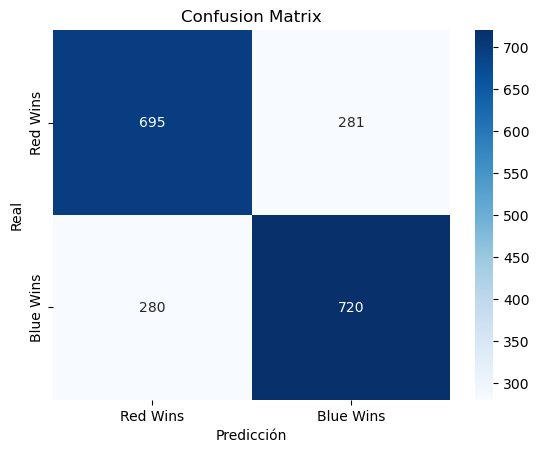

In [87]:
cm = confusion_matrix(y_test, final_predict)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Red Wins", "Blue Wins"], yticklabels=["Red Wins", "Blue Wins"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Confusion Matrix")
plt.show()

Ahora vamos a realizar un análisis sobre la importancia de las características en el modelo de regresión logística entrenado.
* **Feature**: las variables (o características) incluidas en el modelo.
* **Importance**: en términos de regresión logística, la importancia de una característica está determinada por el valor absoluto de su coeficiente (coef_). Los coeficientes indican el efecto de cada característica en la predicción.
    * Valor positivo: Un aumento en esta característica incrementa la probabilidad de que el modelo prediga una victoria azul.
    * Valor negativo: Un aumento en esta característica reduce la probabilidad de que el modelo prediga una victoria azul.
    * Valor cercano a 0: La característica tiene poco o ningún impacto en la predicción del modelo.

                   Feature  Importance
0            blueTotalGold    0.549703
2      blueTotalExperience    0.298902
11             blueDragons    0.143668
9        blueEliteMonsters    0.000599
5                blueKills    0.000000
6               redAssists    0.000000
7              blueAssists    0.000000
8   blueTotalMinionsKilled    0.000000
12   redTotalMinionsKilled    0.000000
13          blueFirstBlood    0.000000
4                 redKills   -0.000978
14              redDragons   -0.018338
10        redEliteMonsters   -0.066923
3       redTotalExperience   -0.231808
1             redTotalGold   -0.540634


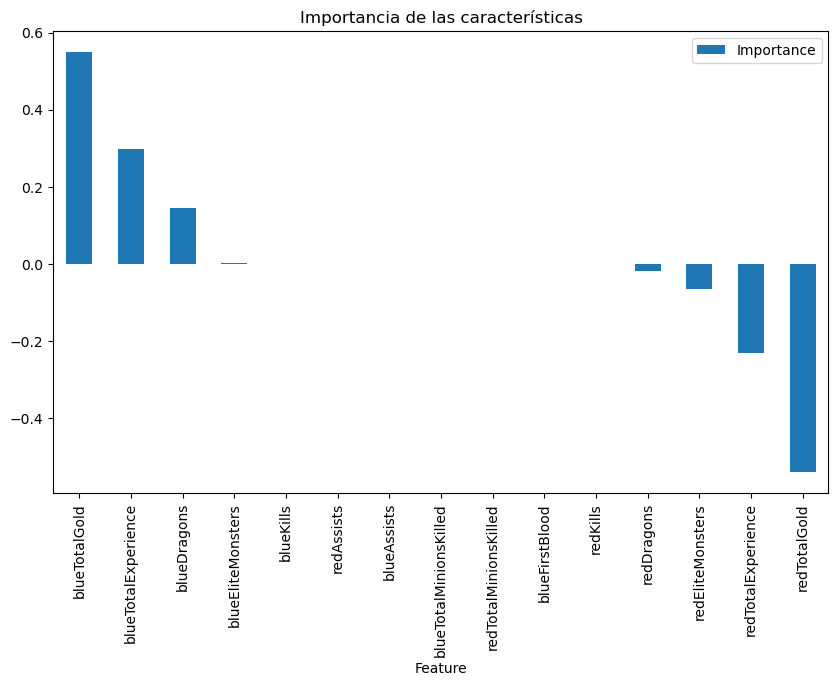

In [88]:
feature_importance = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': final_model.coef_[0]
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

feature_importance.plot(kind='bar', x='Feature', y='Importance', figsize=(10, 6))
plt.title("Importancia de las características")
plt.show()

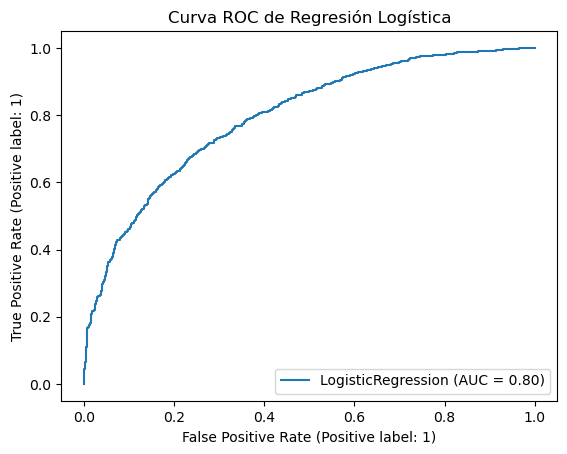

In [90]:
RocCurveDisplay.from_estimator(final_model, x_test_scaled, y_test)
plt.title("Curva ROC de Regresión Logística")
plt.show()

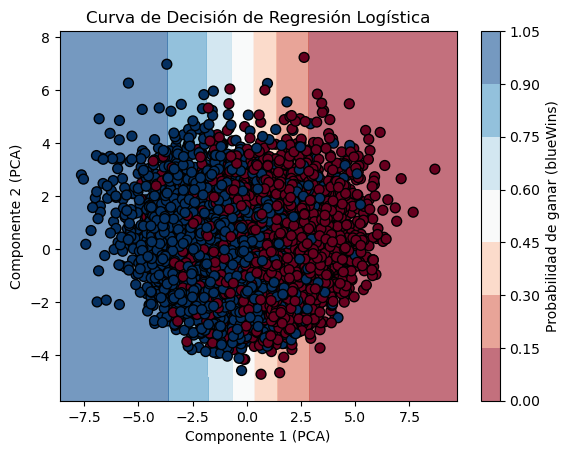

In [112]:
# Usando PCA para reducir a dos dimensiones (si tienes más de dos características)
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(x_train_scaled)

# Entrenar el modelo final con los mejores hiperparámetros encontrados
best_params = grid_search_lr.best_params_
final_model_1 = LogisticRegression(**best_params)
final_model_1.fit(X_train_2d, y_train)

# Crear un conjunto de puntos para visualizar la curva de decisión
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
x, y = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predecir sobre el conjunto
Z = final_model_1.predict_proba(np.c_[x.ravel(), y.ravel()])[:, 1]
Z = Z.reshape(x.shape)

# Graficar la curva de decisión
plt.contourf(x, y, Z, cmap=plt.cm.RdBu, alpha=0.6)
plt.colorbar(label='Probabilidad de ganar (blueWins)')

# Graficar los puntos de entrenamiento
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=plt.cm.RdBu, edgecolors='k', s=50)
plt.title('Curva de Decisión de Regresión Logística')
plt.xlabel('Componente 1 (PCA)')
plt.ylabel('Componente 2 (PCA)')
plt.show()